## Novartis Data Science Hiring Challenge
##### By Dr. Anup Rana

- MSc in Data Science, Liverpool John Moores University, UK, Mar-2019 - present
- PG Diploma in Data Science, IIIT Bangalore, Mar-2019 - Mar-2020
- PhD in Computational Organic Chemistry, Universität Siegen, Germany, Aug-2011 - Jul-2017
- MSc in Chemistry, IIT Kanpur, Jun-2009 - May-2011

- Email: anup9802@gmail.com
- LinkedIn: https://www.linkedin.com/in/anup-rana-phd-0576832b/
- Github: https://github.com/anup9802?tab=repositories

In [1]:
#Importing necessary libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

from sklearn.pipeline import Pipeline
from sklearn import linear_model, decomposition
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, recall_score
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

from pycaret.classification import*

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

#### Loading Data & Basic Data Quality Check

In [2]:
#Loading the train & test datasets
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
#Basic data checks
print('Shape of the train dataset: ', train.shape)
print('Shape of the test dataset: ', test.shape)

print('There are null values in the train dataset: ', train.isna().values.any())
print('There are null values in the test dataset: ', test.isna().values.any())

print('There are duplicate entries:',train['INCIDENT_ID'].duplicated().values.any())

Shape of the train dataset:  (23856, 18)
Shape of the test dataset:  (15903, 17)
There are null values in the train dataset:  True
There are null values in the test dataset:  True
There are duplicate entries: False


In [4]:
train.head(3)

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1


In [5]:
#Basic sanity check
train.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INCIDENT_ID       23856 non-null  object 
 1   DATE              23856 non-null  object 
 2   X_1               23856 non-null  int64  
 3   X_2               23856 non-null  int64  
 4   X_3               23856 non-null  int64  
 5   X_4               23856 non-null  int64  
 6   X_5               23856 non-null  int64  
 7   X_6               23856 non-null  int64  
 8   X_7               23856 non-null  int64  
 9   X_8               23856 non-null  int64  
 10  X_9               23856 non-null  int64  
 11  X_10              23856 non-null  int64  
 12  X_11              23856 non-null  int64  
 13  X_12              23674 non-null  float64
 14  X_13              23856 non-null  int64  
 15  X_14              23856 non-null  int64  
 16  X_15              23856 non-null  int64 

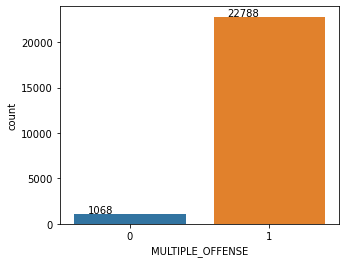

In [7]:
#Checking the class imbalance
plt.figure( figsize=(5,4))
# create count plot
ax = sns.countplot(x='MULTIPLE_OFFENSE', data = train)
# annotate
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+50))

* The dataset has very high class imbalance. 95.13% of the cases the incidents were hack

In [8]:
#list of the columns in the train dataset
print(list(train))

['INCIDENT_ID', 'DATE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'MULTIPLE_OFFENSE']


#### The EDA

Note: The EDA has been perfomed extensively but to keep things simple and concise, only the fruitful/important results are shown below. It in noteworthy to mention that featuretools also has been utilized for deep feature synthesis but could not identify any important feature.

Key takeways from EDA: 
* Some of the scatter plots show clear patterns (cell 9 & 10) in the data and accodingly new features have been generated (cell 27 & 28)
* Scatter plots with transoformed features (log, log1p & all the trigonometric transformation) have been attempted and identified one plot (Cell 12) revealing some hidden patterns in the data. Accordingly new feature has been generated with the help of logistic regression (please check cell 13-16 & 26).
* A list of new features has been generated from the DATE variable (cell 21)

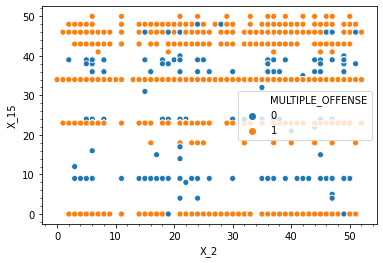

In [9]:
'''A 'X_2' vs 'X_15' scatter plot reveals that we have multiple separation boundaries (for the target variable) along 
the X_15 axis. We will utilize this insight to get new feature (cell 27)'''
fig, ax = plt.subplots()
sns.scatterplot(x= 'X_2',y='X_15',data=train,hue='MULTIPLE_OFFENSE')
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

Conclusion:
- If X_15 > 34 & X_15 < 41 MULTIPLE_OFFENSE = 0
- If X_15 > 23 & X_15 < 34 MULTIPLE_OFFENSE = 0
- If X_15 > 0 & X_15 < 18 MULTIPLE_OFFENSE = 0

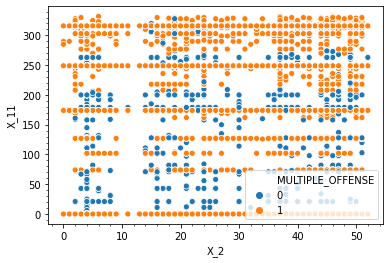

In [10]:
#As above,the scatter plot below shows that the X_11 is a highly important feature to get the decision boundaries
fig, ax = plt.subplots()
sns.scatterplot(x= 'X_2',y='X_11',data=train,hue='MULTIPLE_OFFENSE')
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

Conclusion:
- If X_11 > 250 & X_11 < 270 MULTIPLE_OFFENSE = 0
- If X_11 > 175 & X_11 < 208 MULTIPLE_OFFENSE = 0
- If X_11 > 127 & X_11 < 162 MULTIPLE_OFFENSE = 0
- If X_11 > 102 & X_11 < 126 MULTIPLE_OFFENSE = 0
- If X_11 > 74 & X_11 < 102 MULTIPLE_OFFENSE = 0
- If X_11 > 0 & X_11 < 74 MULTIPLE_OFFENSE = 0

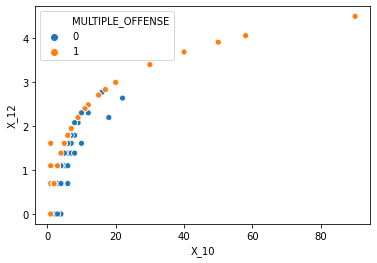

In [11]:
#Interestingly, a log transformation of X_12 enables us to envisage a non-linear separation boundary
sns.scatterplot(train['X_10'], np.log(train['X_12']), hue=train['MULTIPLE_OFFENSE'])

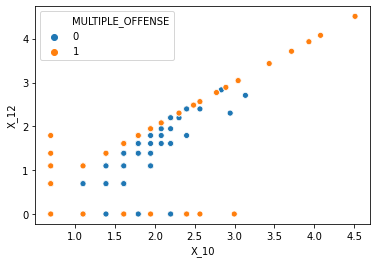

In [12]:
#Above non-linear boundary becomes linear when both the X_10 and X_12 features are log1p-transformed
sns.scatterplot(np.log1p(train['X_10']), np.log1p(train['X_12']), hue=train['MULTIPLE_OFFENSE'])

##### Creating model to generate new feature

In [13]:
#Let's create a model to generate new feature out of the np.log1p(train['X_10']) and np.log1p(train['X_12'])
new_feat = pd.DataFrame()
new_feat['X_10_log'] = train['X_10']
new_feat['X_12_log'] = train['X_12']
new_feat['label'] = train['MULTIPLE_OFFENSE']

new_feat.dropna(inplace = True)

new_feat['X_10_log'] = np.log1p(new_feat['X_10_log'])
new_feat['X_12_log'] = np.log1p(new_feat['X_12_log'] )

In [14]:
logistic = linear_model.LogisticRegression(class_weight='balanced', solver='liblinear')
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']
parameters = dict(logistic__C=C,logistic__penalty=penalty)
pipe = Pipeline(steps=[('logistic', logistic)])

clf = GridSearchCV(pipe, parameters)

clf.fit(new_feat[['X_10_log', 'X_12_log']], new_feat['label'])

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=None,
                                   

In [15]:
print('Best Penalty:', clf.best_estimator_.get_params()['logistic__penalty'])
print('Best C:', clf.best_estimator_.get_params()['logistic__C'])
print(); print(clf.best_estimator_.get_params()['logistic'])

Best Penalty: l1
Best C: 0.0013894954943731374

LogisticRegression(C=0.0013894954943731374, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [16]:
CV_Result = cross_val_score(clf, new_feat[['X_10_log', 'X_12_log']], new_feat['label'], cv=4, n_jobs=-1, scoring = 'recall')
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())


[0.88021939 0.88605803 0.87772076 0.8793134 ]

0.8808278942919872

0.003149310531786005


* Interestingly, only two transformed variables can result a recall score of 0.88!
* The prediction of the above model will be a new feature (please refer to the cell 26) for our final prediction.

#### Merging the train and test datasets for preprocessing

In [17]:
#merging the train and test datasets for preprocessing
ntrain = train.shape[0]
ntest = train.shape[0]
y = train.MULTIPLE_OFFENSE.values
all_data = pd.concat((train, test), sort=False).reset_index(drop=True)
all_data.drop(['MULTIPLE_OFFENSE'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (39759, 17)


In [18]:
all_data.head(2)

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34


In [19]:
#INCIDENT_ID is not relevent for our modelling, so let's drop it
all_data.drop('INCIDENT_ID', axis = 1, inplace = True)

#### The Outliers

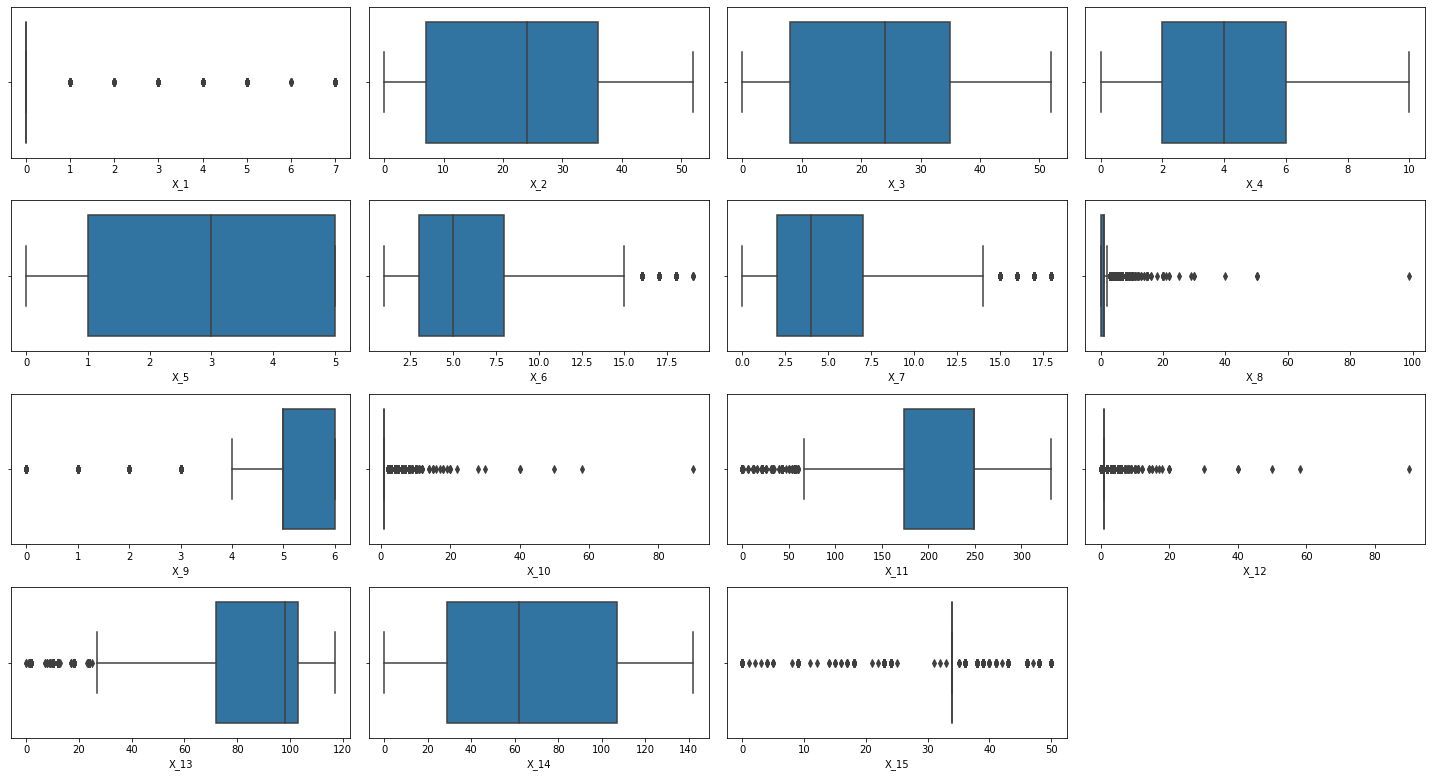

In [20]:
#Box plots to visualize outliers
plt.figure(figsize=(20,40), facecolor='white')

num_feats = list(all_data.describe())
plot_number = 1 #plot numbering starts at 1, not 0
for feat in num_feats:
    ax = plt.subplot(15, 4, plot_number) #15x4 grid,
    sns.boxplot(all_data[feat])
    #Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.tight_layout()

* Looks like X_1, X_6, X_7, X_8, X_9,X_10, X_11, X_12, X_13 and X_15 suffers heavily from the presence of outliers
* Because of annonymity of the features, it is not clear whether the outliers are artificial or natural. So, for the time being I will proceed without any outlier treatment. Incase I dont get any satisfactory result, will come back to this point again.

#### Handling Mising Values & Feature Engineering

In [21]:
#Derived features from the DATE column
all_data['DATE'] =  pd.to_datetime(all_data['DATE'])

Weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
Weekend = ['Saturday', 'Sunday']
all_data['weekend'] = all_data['DATE'].dt.day_name()
all_data['weekend'] = all_data['weekend'].replace(Weekend, 1).replace(Weekdays, 0) #getting the weekends

all_data['day'] = all_data['DATE'].dt.day
all_data['month'] = all_data['DATE'].dt.month
#all_data['year'] = all_data['DATE'].dt.year #I have not extracted year for model building, becuase the future data of year will make this a forecasting problem

all_data.drop('DATE', axis = 1, inplace = True) #dropping the original date column

In [22]:
all_data.head(2)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,weekend,day,month
0,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,1,4,7
1,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,0,18,7


In [23]:
#Checking percentage of null values in each columns
all_data.isna().sum()*100/all_data.shape[0]

X_1        0.000000
X_2        0.000000
X_3        0.000000
X_4        0.000000
X_5        0.000000
X_6        0.000000
X_7        0.000000
X_8        0.000000
X_9        0.000000
X_10       0.000000
X_11       0.000000
X_12       0.777183
X_13       0.000000
X_14       0.000000
X_15       0.000000
weekend    0.000000
day        0.000000
month      0.000000
dtype: float64

In [24]:
#Missing value imputation using IterativeImputer
imputer = IterativeImputer(max_iter=100)
all_data[num_feats] = imputer.fit_transform(all_data[num_feats])

In [25]:
#Confirming there is no missing value anymore
all_data.isna().values.any()

False

In [26]:
#Generate new feature using the model in cell 14
new_feat = pd.DataFrame()
new_feat['X_10_log'] = np.log1p(all_data['X_10'])
new_feat['X_12_log'] = np.log1p(all_data['X_12'])

pred = clf.predict(new_feat)

all_data['X_10_log1p_&_X_12_log1p'] = pred

all_data.head(2)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,weekend,day,month,X_10_log1p_&_X_12_log1p
0,0.0,36.0,34.0,2.0,1.0,5.0,6.0,1.0,6.0,1.0,174.0,1.0,92.0,29.0,36.0,1,4,7,1
1,1.0,37.0,37.0,0.0,0.0,11.0,17.0,1.0,6.0,1.0,236.0,1.0,103.0,142.0,34.0,0,18,7,1


In [27]:
#Generating new feature, from the observation in cell 9
new_feat = all_data.copy()
new_feat[(new_feat['X_15'] > 34) & (new_feat['X_15'] < 41)] = 0
new_feat[(new_feat['X_15'] > 23) & (new_feat['X_15'] < 34)] = 0
new_feat[(new_feat['X_15'] > 0) & (new_feat['X_15'] < 18)] = 0
new_feat[new_feat['X_15'] != 0] = 1

all_data['X_15_new'] = new_feat['X_15']
all_data.head(2)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,weekend,day,month,X_10_log1p_&_X_12_log1p,X_15_new
0,0.0,36.0,34.0,2.0,1.0,5.0,6.0,1.0,6.0,1.0,174.0,1.0,92.0,29.0,36.0,1,4,7,1,0.0
1,1.0,37.0,37.0,0.0,0.0,11.0,17.0,1.0,6.0,1.0,236.0,1.0,103.0,142.0,34.0,0,18,7,1,1.0


In [28]:
#Generating new feature, from the observation in cell 10
new_feat = all_data.copy()
new_feat[(new_feat['X_11'] > 250) & (new_feat['X_11'] < 270)] = 0
new_feat[(new_feat['X_11'] > 175) & (new_feat['X_11'] < 208)] = 0
new_feat[(new_feat['X_11'] > 127) & (new_feat['X_11'] < 162)] = 0
new_feat[(new_feat['X_11'] > 102) & (new_feat['X_11'] < 126)] = 0
new_feat[(new_feat['X_11'] > 74) & (new_feat['X_11'] < 102)] = 0
new_feat[(new_feat['X_11'] > 0) & (new_feat['X_11'] < 74)] = 0
new_feat[new_feat['X_11'] != 0] = 1

all_data['X_11_new'] = new_feat['X_11']
all_data.head(2)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_12,X_13,X_14,X_15,weekend,day,month,X_10_log1p_&_X_12_log1p,X_15_new,X_11_new
0,0.0,36.0,34.0,2.0,1.0,5.0,6.0,1.0,6.0,1.0,...,1.0,92.0,29.0,36.0,1,4,7,1,0.0,1.0
1,1.0,37.0,37.0,0.0,0.0,11.0,17.0,1.0,6.0,1.0,...,1.0,103.0,142.0,34.0,0,18,7,1,1.0,1.0


#### Getting Back the Processed Train and Test Datasets

In [29]:
X_train = all_data[:ntrain]
train_data = X_train.copy()
train_data['labels'] = y
X_test = all_data[ntrain:]

#### Model Building

In [30]:
#Setting up the pycaret environments
clf = setup(data = train_data, 
            target = 'labels',
            train_size = 0.8,
            sampling = False,
            session_id = 1030)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1030
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(23856, 22)"
4,Missing Values,False
5,Numeric Features,16
6,Categorical Features,5
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [31]:
#Comparing performance of 15 algos and their models in one go
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Gradient Boosting Classifier,0.999300,0.999700,1.000000,0.999300,0.999600,0.992000
1,Ada Boost Classifier,0.999100,0.999700,0.999900,0.999100,0.999500,0.989500
2,Light Gradient Boosting Machine,0.999100,0.999700,0.999900,0.999100,0.999500,0.989500
3,CatBoost Classifier,0.999100,0.999900,1.000000,0.999100,0.999500,0.989500
4,Decision Tree Classifier,0.999000,0.992200,0.999600,0.999300,0.999500,0.987700
5,Extreme Gradient Boosting,0.999000,0.999800,1.000000,0.998900,0.999500,0.987600
6,Random Forest Classifier,0.998000,0.997300,0.999500,0.998400,0.998900,0.975800
7,Extra Trees Classifier,0.997700,0.998900,0.999800,0.997800,0.998800,0.972400
8,Linear Discriminant Analysis,0.991000,0.996200,0.998600,0.992100,0.995300,0.887100
9,Quadratic Discriminant Analysis,0.984500,0.994300,0.987100,0.996700,0.991800,0.834800


Conclusion:
- Top three performers are: gbc, xgb & catboost and all of them come with a recall score of 1.000000!

In [32]:
#Creating the gbc model
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9984,1.0000,1.0,0.9984,0.9992,0.9814
1,0.9995,0.9991,1.0,0.9995,0.9997,0.9939
2,1.0000,1.0000,1.0,1.0000,1.0000,1.0000
3,0.9984,0.9988,1.0,0.9984,0.9992,0.9814
4,0.9990,0.9998,1.0,0.9989,0.9995,0.9875
5,0.9995,1.0000,1.0,0.9995,0.9997,0.9938
6,0.9995,1.0000,1.0,0.9995,0.9997,0.9938
7,0.9995,1.0000,1.0,0.9995,0.9997,0.9938
8,1.0000,1.0000,1.0,1.0000,1.0000,1.0000
9,0.9995,0.9995,1.0,0.9995,0.9997,0.9938


In [33]:
#Creating the xgb model
xgb = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9984,0.9998,1.0,0.9984,0.9992,0.9814
1,0.9990,1.0000,1.0,0.9989,0.9995,0.9877
2,0.9995,1.0000,1.0,0.9995,0.9997,0.9939
3,0.9979,0.9994,1.0,0.9978,0.9989,0.9751
4,0.9990,0.9995,1.0,0.9989,0.9995,0.9875
5,0.9984,0.9999,1.0,0.9984,0.9992,0.9812
6,0.9995,1.0000,1.0,0.9995,0.9997,0.9938
7,0.9990,0.9999,1.0,0.9989,0.9995,0.9875
8,0.9995,1.0000,1.0,0.9995,0.9997,0.9938
9,0.9995,0.9998,1.0,0.9995,0.9997,0.9938


In [34]:
#Creating the catboost model
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9984,1.0000,1.0,0.9984,0.9992,0.9814
1,0.9995,1.0000,1.0,0.9995,0.9997,0.9939
2,0.9995,1.0000,1.0,0.9995,0.9997,0.9939
3,0.9979,0.9990,1.0,0.9978,0.9989,0.9751
4,0.9990,1.0000,1.0,0.9989,0.9995,0.9875
5,0.9990,1.0000,1.0,0.9989,0.9995,0.9875
6,1.0000,1.0000,1.0,1.0000,1.0000,1.0000
7,0.9990,1.0000,1.0,0.9989,0.9995,0.9875
8,0.9995,1.0000,1.0,0.9995,0.9997,0.9938
9,0.9995,1.0000,1.0,0.9995,0.9997,0.9938


In [35]:
#Predictions on the hold-out data (20%)
pred_holdout = predict_model(gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Gradient Boosting Classifier,0.9998,0.9998,1.0,0.9998,0.9999,0.9975


In [36]:
#Predictions on the hold-out data (20%)
pred_holdout = predict_model(xgb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.9985,0.9999,0.9998,0.9987,0.9992,0.9827


In [37]:
#Predictions on the hold-out data (20%)
pred_holdout = predict_model(catboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.9992,1.0,1.0,0.9991,0.9996,0.9901


Conclusion:
- In the validation set (the hold-out data), all the above three are performing pretty well but when the test-solutions were checked against the hackerearth portal, the catboost was found to be the best one with a score of 99.38102. The stacking also attempted (see below) and found to be improving result to 99.70842.

#### Fine Tuning

In [38]:
#Stacking
stacker = stack_models(estimator_list = [catboost,xgb], meta_model = gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9990,1.0000,0.9995,0.9995,0.9995,0.9878
1,0.9990,0.9999,0.9995,0.9995,0.9995,0.9878
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9984,0.9940,1.0000,0.9984,0.9992,0.9814
4,0.9990,1.0000,1.0000,0.9989,0.9995,0.9875
5,0.9984,1.0000,0.9995,0.9989,0.9992,0.9814
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.9990,1.0000,0.9995,0.9995,0.9995,0.9877


In [39]:
#Predictions on the hold-out data (20%)
pred_holdout = predict_model(stacker)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Stacking Classifier,0.9994,1.0,0.9996,0.9998,0.9997,0.9927


Conclusion:
- After getting a great score (99.70842) from the stacking, a majority vote of the solutions from xgb, gbc, catboost and stacker was attempted and the solution was found to be the best one with a score of 99.72160!

In [40]:
#Majority vote in train dataset
pred_stack_train = predict_model(stacker, data = train_data[list(X_test)])
pred_xgb_train = predict_model(xgb, data = train_data[list(X_test)])
pred_gbc_train = predict_model(gbc, data = train_data[list(X_test)])
pred_catboost_train = predict_model(catboost, data = train_data[list(X_test)])

pred_train = pd.DataFrame()
pred_train['stacker'] = pred_stack_train['Label']
pred_train['xgb'] = pred_xgb_train['Label']
pred_train['gbc'] = pred_gbc_train['Label']
pred_train['catboost'] = pred_catboost_train['Label']

pred_train['majority'] = pred_train.mode(axis=1)[0].astype(int)

print('Recall score in the train dataset: ', recall_score(y, pred_train['majority']))

Recall score in the train dataset:  1.0


In [41]:
#Majority vote in test dataset
pred_stack_test = predict_model(stacker, data = X_test)
pred_xgb_test = predict_model(xgb, data = X_test)
pred_gbc_test = predict_model(gbc, data = X_test)
pred_catboost_test = predict_model(catboost, data = X_test)

pred_test = pd.DataFrame()
pred_test['stacker'] = pred_stack_test['Label']
pred_test['xgb'] = pred_xgb_test['Label']
pred_test['gbc'] = pred_gbc_test['Label']
pred_test['catboost'] = pred_catboost_test['Label']

pred_test['majority'] = pred_test.mode(axis=1)[0].astype(int)

In [42]:
#Making things ready for submission
sub = pd.DataFrame()
sub['INCIDENT_ID'] = test['INCIDENT_ID']
sub['MULTIPLE_OFFENSE'] = pred_test['majority']

sub.to_csv('Sub_Anup.csv',index=False)

#### Feature Importance

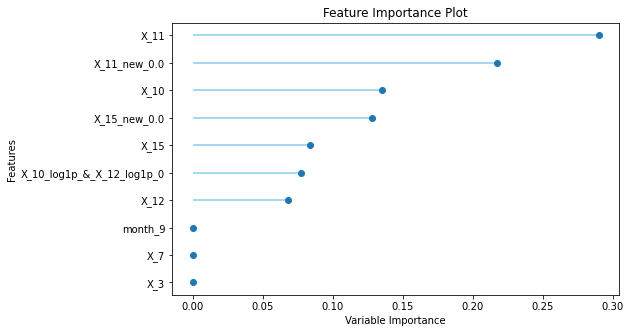

In [43]:
#The feature importances
plot_model(gbc, 'feature')

Final Conclusion:
- The X_11 was found to be the most important feature
- The derived features ('X_11_new', 'X_15_new' & 'X_10log1p_&_X_12_log1p') are playing very crucial role in the prediction.